In [1]:
using Plots
using LinearAlgebra: cross, norm

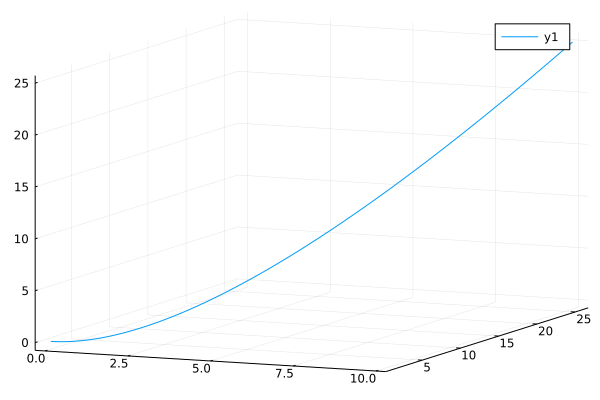

In [21]:
stopTime = 10
frames = 5000
dt = stopTime / frames

# State storage and inital conditions
t = Vector{Real}(undef, frames); t[1] = 0 # Time
r = Matrix{Real}(undef, frames, 3); r[1,:] = [1 0 0] # Position
v = Matrix{Real}(undef, frames, 3); v[1,:] = [0 0 0] # Velocity
q = 1 # Charge
m = 1 # Mass

w = 1 # Rotational speed

# Verify time step meets leapfrog requirements
@assert dt < 2 / w

# Define electric field as function of position
E(r::Vector{Real})::Vector{Real} = 0.5*[1, 1, 1] # -(m/q)*w^2 * r;

# Define magnetic field as function of position
B(r::Vector{Real})::Vector{Real} = 10*[1, 1, 1]

# Use leapfrog method by offsetting v by dt/2 backwards
v[1,:] -= q / m * E(r[1,:]) * dt / 2

# Main event loop
for i in 2:frames
    t[i] = t[i-1] + dt # Update time
    r[i,:,] = r[i-1,:] + v[i-1,:] * dt # Update position
    v[i,:] = v[i-1,:] + dt*q/m * (E(r[i-1,:]) + cross(v[i-1,:], B(r[i-1,:]))) # Update tome

end

plot(t, r[:,1], r[:,3])
# rPlot = plot(t, r[:,1], label="Position", xlabel="Time", ylabel="Position and Velocity")
# plot!(t, v[:,1], label="Velocity")

# predictedX = cos.(w*t)
# plot!(t, predictedX, label="Predicted Positon")
# predictedV = -w*sin.(w*t)
# plot!(t, predictedV, label="Predicted Velocity")

# display(rPlot)
# plot(v[:,1], r[:,1])

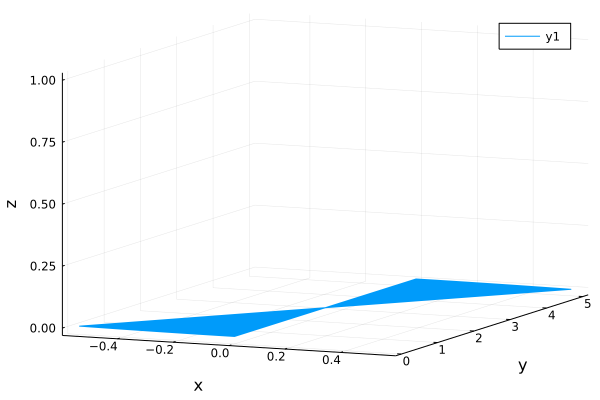

In [17]:
stopTime = 0.25
frames = 5000
dt = stopTime / frames

# State storage and inital conditions
t = Vector{Real}(undef, frames); t[1] = 0 # Time
r = Matrix{Real}(undef, frames, 3); r[1,:] = [0 0 0] # Position
v = Matrix{Real}(undef, frames, 3); v[1,:] = [0 1e5 0] # Velocity
q = -1.602e-19 # Charge
m = 9.109e-31 # Mass

w = 1 # Rotational speed

# Verify time step meets leapfrog requirements
@assert dt < 2 / w

# Define electric field as function of position
E(r::Vector{Real})::Vector{Real} = [0, 0, 0] # -(m/q)*w^2 * r;

# Define magnetic field as function of position
B(r::Vector{Real})::Vector{Real} = [0, 0, 0.01]

v[1,:] -= q / m * E(r[1,:]) * dt / 2 # Update for mag field

# Main event loop
for i in 2:frames
    t[i] = t[i-1] + dt # Update time
    
    vMinus = v[i-1,:] + q / m * E(r[i-1,:]) * dt / 2

    tmpVec = q * B(r[i-1,:]) / m * dt / 2
    vPrime = vMinus + cross(vMinus, tmpVec)

    sVec = 2 * tmpVec / (1 + norm(tmpVec)^2)
    vPlus = vMinus + cross(vPrime, sVec)
    
    v[i,:] = vPlus + q / m * E(r[i-1,:]) * dt / 2

    r[i,:,] = r[i-1,:] + v[i-1,:] * dt # Update position
end

plot3d(r[:,1], r[:,2], r[:,3], xlabel="x", ylabel="y", zlabel="z")
#plot(r[:,1], r[:,2], xlabel="x", ylabel="y", seriestype=:line)